Import module printing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#READ DATA
data=pd.read_csv("/content/drive/MyDrive/DATA/Example.csv")
data.head(10)

,Text,lable
0,`- This is not ``creative``. Those are the di...,1
1,` :: the term ``standard model`` is itself le...,0
2,"True or false, the situation as of March 200...",0
3,"Next, maybe you could work on being less cond...",1
4,This page will need disambiguation.,0
5,:If I may butt in I've spent the last 1/4 h...,1
6,` Changed Macedonia link to Macedon; ancients ...,1
7,"` :::: You're onto something important, there...",1
8,`I posted this to because the timeline confus...,0
9,There is no such thing as Christian religiocen...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SAMPLE DATA 4000**

In [ ]:
# Sample data

sample_data = data.sample(4000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['lable']
print(X)
print(y)

235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com...
2895      ==  English versions ==  There is not need t...
                              ...                        
3292     :Like if you were from Switzerland (I'm think...
4040      ::Because the Scottish Episcopal Church is a...
2548      ::: just because freaky animal lib-ers are o...
418     `  Dear Squeakbox:  I have been very polite to...
1083      :As I understand it, there's no rule that it...
Name: Text, Length: 4000, dtype: object
235     0
3980    0
905     1
2763    1
2895    1
       ..
3292    1
4040    0
2548    1
418     1
1083    0
Name: lable, Length: 4000, dtype: object


# WORD CLOUD

In [ ]:
from wordcloud import WordCloud

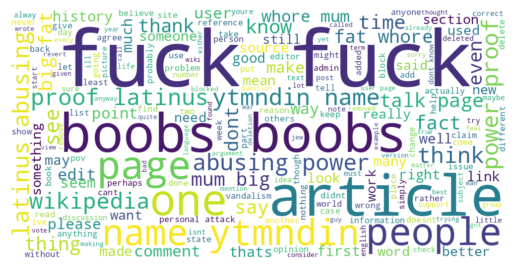

In [ ]:
# Sample a subset of the data to avoid processing the entire dataset
sample_data = data['Text'].sample(4000, replace=True,random_state=1)  # Adjust the sample size as needed

# Create a string with all text data from the sample
word_cloud = " ".join(str(text) for text in sample_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word_cloud)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


# STOP WORDS

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# CLEAN DATA

In [ ]:
import re
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Handle potential float values by converting to string first
    if isinstance(text, float):
        text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)

    # Remove  or digit
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace e.g : " This is our dataset   " becomes "This is our dataset"
    text = text.strip()

    #Remove multiple space e.g. : "This  is   an\nexample   text.\tIt   contains    multiple   spaces  " become "This is an example text.It contains multiple space"
    text = re.sub(r'\s+', ' ', text)

    # Remove special characters and short words
    text = re.sub(r':|<|>|>>|[^a-zA-Z\s]', '', text)

    # Remove 1 0r 2  characters word ( at, a, is, am)
    text = re.sub(r'\b\w{1,2}\b', '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the function to the 'Text' column of your DataFrame
data['Text'] = data['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

data.head()
data.shape
print(data.shape)
print(data.head())
print(data.columns)
print(X.head())
print(y.head())


(4987, 2)
                                                Text lable
0  creative dictionary definitions terms insuranc...     1
1  term standard model less npov think wed prefer...     0
2  true false situation march saudi proposal land...     0
3  next maybe could work less condescending sugge...     1
4                           page need disambiguation     0
Index(['Text', 'lable'], dtype='object')
235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com...
2895      ==  English versions ==  There is not need t...
Name: Text, dtype: object
235     0
3980    0
905     1
2763    1
2895    1
Name: lable, dtype: object


Eliminate last 17 thousand dataset beacuse its too long and time wasting

In [ ]:
data = data.iloc[:4000,:]

In [ ]:
data['lable'].value_counts()

,count
lable,
1,2330
0,1670


visualize the leable

<Axes: xlabel='lable'>

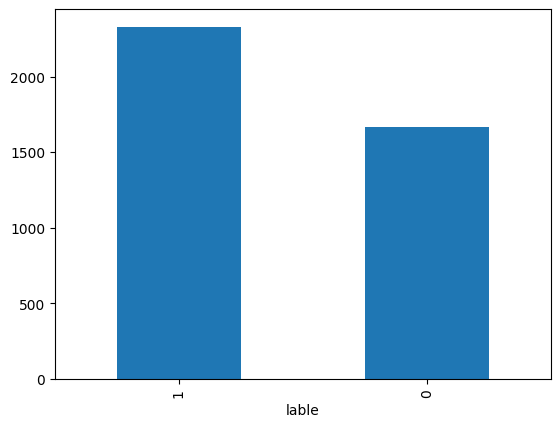

In [ ]:
data['lable'].value_counts().plot(kind='bar')

Creating a pie chart for the label i got

Text(0.5, 1.0, 'label distribution')

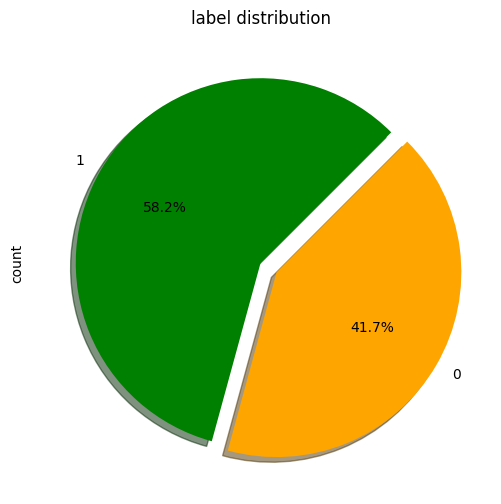

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['lable'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')


the code is trying to extract the value at the 999th position within the  column

visualizing the negetive and positive words,it counts frequents word of each category

In [ ]:
data['Text'][999]

'pig fenian nice wrist action boys keep'

In [ ]:
print(data.columns)

Index(['Text', 'lable'], dtype='object')


Text to numbering featuress


# Text to matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw text documents into a matrix

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Extract the label values from the 'data' DataFrame and assign them to variable 'y'
y=data.lable.values
x=tfidf.fit_transform(data.Text)

training model

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

# **Training and Evaluating a Logistic Regression Model with Cross-Validation**

In [45]:
from sklearn.linear_model import LogisticRegressionCV
#cross-validation to select the best regularization parameter.
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished


Cechking the accuracy it shows 92 percent

# ACCURACY **RATE**

In [46]:
from sklearn import metrics


print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))


Test Accuracy: 0.6025
Train Accuracy: 0.5775
